In [121]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import torch.nn.functional as F

In [104]:
with open('../../outputs/bert/train_metrics.pickle', 'rb') as f:
    training_metrics = pickle.load(f)

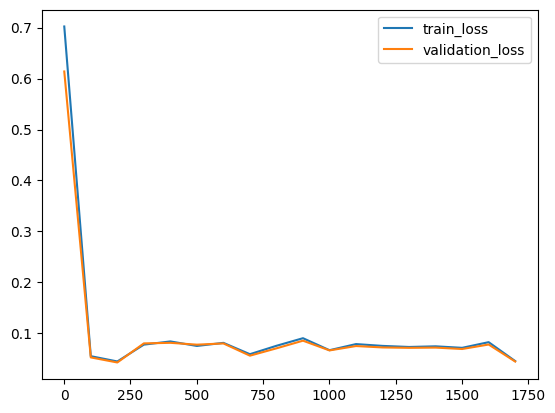

In [105]:
plt.plot(*list(zip(*[(m['global_step'], m['train_loss']) for m in training_metrics])), label='train_loss')
plt.plot(*list(zip(*[(m['global_step'], m['validation_loss']) for m in training_metrics])), label='validation_loss')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--')
plt.legend()
plt.show()

In [108]:
training_metrics[-1]['train_loss']

0.04548068717122078

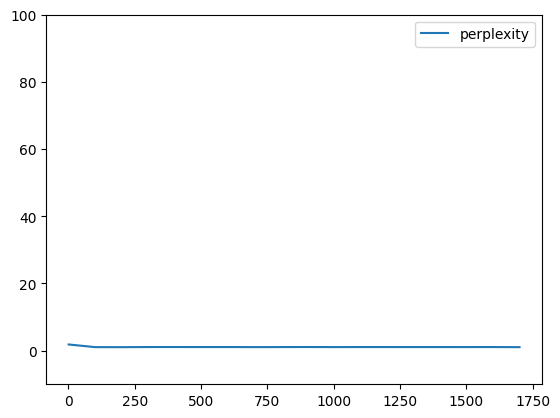

In [109]:
plt.plot(*list(zip(*[(m['global_step'], m['perplexity']) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.ylim(top=100, bottom=-10)
plt.legend()
plt.show()

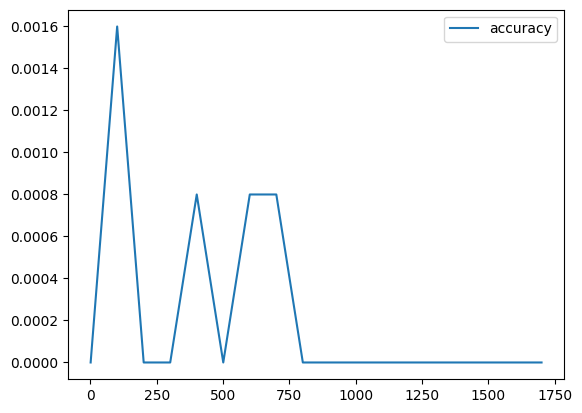

In [110]:
plt.plot(*list(zip(*[(m['global_step'], m['accuracy'].item()) for m in training_metrics])), label='accuracy')# plt.plot(*list(zip(*[(m['global_step'], m['perplexity'].item()) for m in training_metrics])), label='perplexity')
for point in [m['global_step'] for i, m in enumerate(training_metrics) if training_metrics[i-1]['epoch'] != m['epoch']]:
    plt.axvline(x=point, linestyle='--', c='black')
plt.legend()
plt.show()

In [111]:
min([m['validation_loss'] for m in training_metrics])

0.04270941764116287

# Final Evaluation Outputs

In [112]:
food_names = np.load('../../../data/local/final/full/food_names/0.npy', allow_pickle=True)
food_names.shape

(1109,)

In [113]:
len(training_metrics)

18

In [114]:
input = training_metrics[-1]['input']
output = training_metrics[-1]['output']

In [115]:
pd.set_option('max_colwidth', None)

In [116]:
input[1].shape

torch.Size([1000, 15])

In [117]:
output.shape

torch.Size([1000, 2, 1109])

In [125]:
F.sigmoid(output)[:,:,1:].argmax(dim=2)

tensor([[289, 289],
        [289, 289],
        [289, 289],
        ...,
        [289, 289],
        [289, 289],
        [289, 289]])

In [123]:
pd.DataFrame({
    'input': food_names[input[0]].tolist(), 
    'mask_pos': input[3].tolist(),
    'label': food_names[input[2]].tolist(),
    'prediction': food_names[F.sigmoid(output)[:,:,1:].argmax(2)].tolist(), 
})

,input,mask_pos,label,prediction
0,"[gelatin, water, yogurt, sugar, vanilla, cardamom, sweet orange, cinnamon, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[2, 0]","[yogurt, <pad>]","[ginger, ginger]"
1,"[egg roll, <mask>, pudding, cinnamon, margarine, nut, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[1, 0]","[sugar, <pad>]","[ginger, ginger]"
2,"[cracker, butter, sugar, flour, sauce, clawed lobster, cocoa powder, salt, potato chip, marshmallow, <pad>, <pad>, <pad>, <pad>, <pad>]","[5, 6]","[water, cocoa powder]","[ginger, ginger]"
3,"[coffee, almond, curry powder, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[3, 0]","[sugar substitute, <pad>]","[ginger, ginger]"
4,"[pie crust, spinach, egg, onion-family vegetable, nutmeg, crab, cheese, chum salmon, salt, pepper, honey, <pad>, <pad>, <pad>, <pad>]","[7, 10]","[evaporated milk, parsley]","[ginger, ginger]"
...,...,...,...,...
995,"[meat bouillon, onion-family vegetable, green turtle, sauce, garlic, green bean, rice, cheese, <mask>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[8, 0]","[tortilla, <pad>]","[ginger, ginger]"
996,"[chicken, <mask>, walnut, sweet orange, <unknown>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[1, 0]","[sauce, <pad>]","[ginger, ginger]"
997,"[egg, <mask>, buttermilk, honey, curry powder, water, salt, flour, butter, vanilla, quinoa, syrup, <pad>, <pad>, <pad>]","[10, 1]","[domestic pig, cream]","[ginger, ginger]"
998,"[butter, flour, <mask>, salt, sugar, egg, vanilla, milk cow, chocolate, <pad>, <pad>, <pad>, <pad>, <pad>, <pad>]","[2, 0]","[curry powder, <pad>]","[ginger, ginger]"


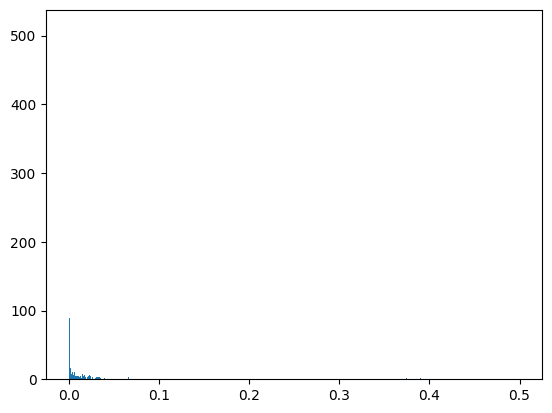

In [120]:
import torch.nn.functional as F
plt.hist(F.sigmoid(output[0,0,:]), bins=1000);

In [31]:
(output[0,0,:] > 0).sum()

tensor(0)